
# Projeto Interdisciplinar — Entrega 1 (PicMoney)




In [4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 60)

# URLs diretas dos arquivos no GitHub
FILES = {
    "players":   "https://raw.githubusercontent.com/2025-2-NCC4/Projeto13/refs/heads/main/Documentos/Entrega1/PI%20Ci%C3%AAncia%20de%20Dados/Base%20de%20Dados/PicMoney-Base_Cadastral_de_Players-10_000%20linhas.csv",
    "pedestres": "https://raw.githubusercontent.com/2025-2-NCC4/Projeto13/refs/heads/main/Documentos/Entrega1/PI%20Ci%C3%AAncia%20de%20Dados/Base%20de%20Dados/PicMoney-Base_Simulada_-_Pedestres_Av__Paulista-100000%20linhas.csv",
    "cupons":    "https://raw.githubusercontent.com/2025-2-NCC4/Projeto13/refs/heads/main/Documentos/Entrega1/PI%20Ci%C3%AAncia%20de%20Dados/Base%20de%20Dados/PicMoney-Base_de_Transa__es_-_Cupons_Capturados-100000%20linhas.csv",
    "lojas":     "https://raw.githubusercontent.com/2025-2-NCC4/Projeto13/refs/heads/main/Documentos/Entrega1/PI%20Ci%C3%AAncia%20de%20Dados/Base%20de%20Dados/PicMoney-Massa_de_Teste_com_Lojas_e_Valores-10000%20linhas.csv"
}

# Lendo os CSVs em DataFrames
datasets = {}
for name, url in FILES.items():
    try:
        df = pd.read_csv(url, sep=";", encoding="utf-8-sig")
        datasets[name] = df
        print(f"[OK] {name}: {df.shape[0]} linhas, {df.shape[1]} colunas")
    except Exception as e:
        print(f"[ERRO] ao ler {name} de {url}: {e}")


[OK] players: 10000 linhas, 11 colunas
[OK] pedestres: 100000 linhas, 15 colunas
[OK] cupons: 100000 linhas, 12 colunas
[OK] lojas: 10000 linhas, 11 colunas


In [5]:

players = datasets['players'].copy()
cupons = datasets['cupons'].copy()
pedestres = datasets['pedestres'].copy()
lojas = datasets['lojas'].copy()

def to_datetime_safe(s):
    import pandas as pd
    return pd.to_datetime(s, errors='coerce')

players['data_nascimento'] = to_datetime_safe(players.get('data_nascimento'))
cupons['data'] = to_datetime_safe(cupons.get('data'))
lojas['data_captura'] = to_datetime_safe(lojas.get('data_captura'))

if 'numero_celular' in lojas.columns:
    lojas = lojas.rename(columns={'numero_celular':'celular'})


In [6]:

# KPIs básicos
kpis = {}
kpis['total_players'] = players['celular'].nunique()
kpis['total_cupons'] = len(cupons)
kpis['total_usuarios_transacionando'] = cupons['celular'].nunique()
kpis['total_lojas'] = lojas['nome_loja'].nunique()
kpis['total_estabelecimentos_transacoes'] = cupons['nome_estabelecimento'].nunique()
kpis['valor_cupom_total'] = float(cupons['valor_cupom'].sum())
kpis['ticket_medio_compra_estimado'] = float(lojas['valor_compra'].mean())
kpis


{'total_players': 9999,
 'total_cupons': 100000,
 'total_usuarios_transacionando': 4813,
 'total_lojas': 15,
 'total_estabelecimentos_transacoes': 33,
 'valor_cupom_total': 55048958.53,
 'ticket_medio_compra_estimado': 549.684075}

In [7]:

# Qualidade (nulos e duplicados)
def quality(df):
    return {
        'rows': len(df),
        'cols': df.shape[1],
        'duplicates': int(df.duplicated().sum()),
        'missing': df.isna().sum().sort_values(ascending=False).head(10)
    }

quality_players = quality(players)
quality_cupons = quality(cupons)
quality_pedestres = quality(pedestres)
quality_lojas = quality(lojas)

quality_players, quality_cupons, quality_pedestres, quality_lojas


({'rows': 10000,
  'cols': 11,
  'duplicates': 0,
  'missing': bairro_escola         6932
  cidade_escola         6932
  data_nascimento       6112
  cidade_trabalho       3969
  bairro_trabalho       3969
  idade                    0
  celular                  0
  bairro_residencial       0
  cidade_residencial       0
  sexo                     0
  dtype: int64},
 {'rows': 100000,
  'cols': 12,
  'duplicates': 0,
  'missing': produto                      66672
  data                         60936
  hora                             0
  celular                          0
  nome_estabelecimento             0
  bairro_estabelecimento           0
  id_campanha                      0
  categoria_estabelecimento        0
  id_cupom                         0
  tipo_cupom                       0
  dtype: int64},
 {'rows': 100000,
  'cols': 15,
  'duplicates': 0,
  'missing': ultimo_tipo_loja          40043
  data_ultima_compra        40043
  ultimo_tipo_cupom         40043
  ultimo_valor_capt

In [8]:
# Verificação da Qualidade dos Dados (colunas com valores nulos e porcentagem)
for name, df in datasets.items():
    print(f"\n=== {name} ===")
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)

    if not missing.empty:
        result = pd.DataFrame({
            "Coluna": missing.index,
            "Valores Nulos": missing.values,
            "% Nulo": (missing.values / len(df) * 100).round(2).astype(str) + "%"
        })
        display(result)
    else:
        print("Não foram encontrados valores nulos.")


=== players ===


,Coluna,Valores Nulos,% Nulo
0,bairro_escola,6932,69.32%
1,cidade_escola,6932,69.32%
2,bairro_trabalho,3969,39.69%
3,cidade_trabalho,3969,39.69%



=== pedestres ===


,Coluna,Valores Nulos,% Nulo
0,data_ultima_compra,40043,40.04%
1,ultimo_tipo_cupom,40043,40.04%
2,ultimo_valor_capturado,40043,40.04%
3,ultimo_tipo_loja,40043,40.04%



=== cupons ===


,Coluna,Valores Nulos,% Nulo
0,produto,66672,66.67%



=== lojas ===
Não foram encontrados valores nulos.


In [9]:
# Exploração dos Dados
max_cols = 8  

for name, df in datasets.items():
    print(f"\n=== {name} ===")
    total_cols = df.shape[1]
    shown_cols = df.columns[:max_cols] 
    
    print(f"Mostrando as primeiras {min(max_cols, total_cols)} de {total_cols} colunas (amostra de 5 linhas).")
    display(df[shown_cols].head(5))


=== players ===
Mostrando as primeiras 8 de 11 colunas (amostra de 5 linhas).


,celular,data_nascimento,idade,sexo,cidade_residencial,bairro_residencial,cidade_trabalho,bairro_trabalho
0,(11) 91409-5506,12/10/1969,55,Masculino,São Paulo,Sé,NaN,NaN
1,(11) 91520-1488,19/02/1981,44,Masculino,São Paulo,Ipiranga,NaN,NaN
2,(11) 98359-5557,10/09/1979,45,Masculino,São Paulo,Santana,NaN,NaN
3,(11) 96514-2674,05/03/1957,68,Masculino,São Paulo,Penha,NaN,NaN
4,(11) 99785-3045,30/10/1969,55,Feminino,São Paulo,Tatuapé,NaN,NaN



=== pedestres ===
Mostrando as primeiras 8 de 15 colunas (amostra de 5 linhas).


,celular,data,horario,local,latitude,longitude,tipo_celular,modelo_celular
0,(11) 98549-4373,22/07/2025,07:30:00,Ponto de Ônibus Pamplona,-23.567.430.342.750.400,-4.664.844.333.528.140,iPhone,iPhone SE
1,(11) 91137-2716,22/07/2025,12:45:00,Ponto de Ônibus Augusta,-23.558.687.303.969.100,-4.665.888.408.315.560,Android,Xiaomi Redmi Note 11
2,(11) 99552-6219,22/07/2025,06:30:00,Shopping Pátio Paulista,-23.570.847.016.535.100,-46.645.781.836.865.100,Android,Xiaomi Redmi Note 11
3,(11) 94777-4030,22/07/2025,19:00:00,Metrô Consolação,-2.355.617.081.756.250,-4.666.130.627.469.660,Android,Motorola G60
4,(21) 91994-3239,22/07/2025,13:00:00,Esquina Rua da Paz,-2.356.254.630.989.870,-4.664.956.662.319.300,iPhone,iPhone 12



=== cupons ===
Mostrando as primeiras 8 de 12 colunas (amostra de 5 linhas).


,celular,data,hora,nome_estabelecimento,bairro_estabelecimento,categoria_estabelecimento,id_campanha,id_cupom
0,(61) 96497-8673,10/07/2025,16:15:00,Habib's,República,Lojas de Eletrônicos e Games,CAM2768,CUP542835
1,(11) 94231-6424,15/07/2025,08:15:00,Smart Fit,Vila Prudente,Lojas de Eletrônicos e Games,CAM6679,CUP291620
2,(11) 97965-2178,20/07/2025,16:45:00,Outback,Tucuruvi,Igrejas e Lojas de Artigos Religiosos,CAM6473,CUP670811
3,(11) 93418-4646,20/07/2025,15:45:00,Subway,Penha,Fisioterapia e Terapias Complementares,CAM8293,CUP590364
4,(11) 97973-1725,07/07/2025,11:00:00,Octavio Café,Santo Amaro,Clínicas Médicas e Laboratórios,CAM5588,CUP528033



=== lojas ===
Mostrando as primeiras 8 de 11 colunas (amostra de 5 linhas).


,numero_celular,data_captura,tipo_cupom,tipo_loja,local_captura,latitude,longitude,nome_loja
0,(41) 96047-8110,05/07/2025,Produto,outros,Calçada aleatória,-23.563.850.985.754.000,-4.665.004.147.929.030,Pão de Açúcar
1,(11) 94020-8306,12/07/2025,Desconto,móveis,Calçada aleatória,-2.356.380.569.343.850,-4.664.954.309.104.300,Pão de Açúcar
2,(11) 92863-4530,19/07/2025,Produto,móveis,Shopping Cidade São Paulo,-23.563.227.246.012.400,-4.665.237.324.108.700,Kalunga
3,(11) 94282-1224,19/07/2025,Produto,vestuário,Semáforo,-2.356.152.623.615.530,-4.665.376.976.958.120,Daiso Japan
4,(11) 91506-1278,05/07/2025,Produto,outros,Shopping Pátio Paulista,-2.357.068.984.231.570,-46.645.488.231.986.900,Smart Fit


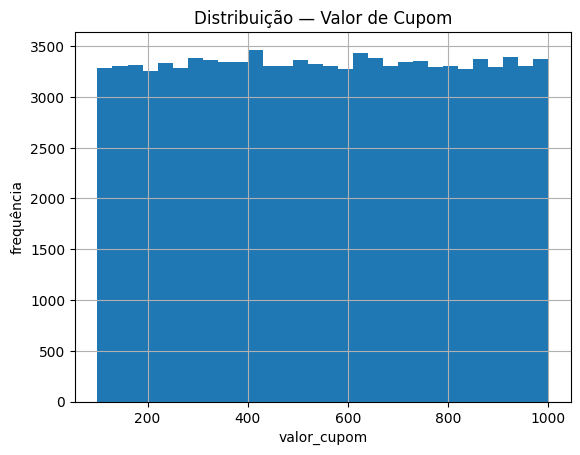

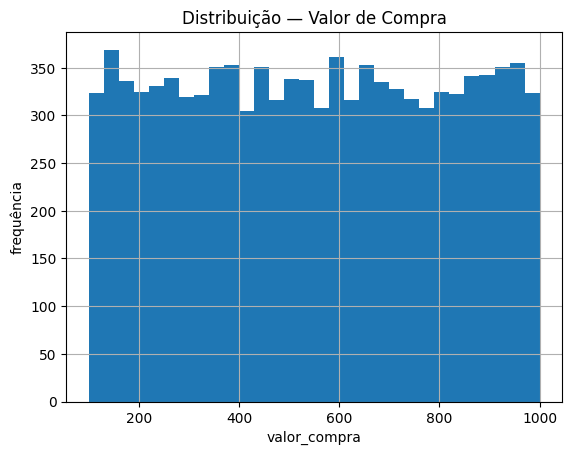

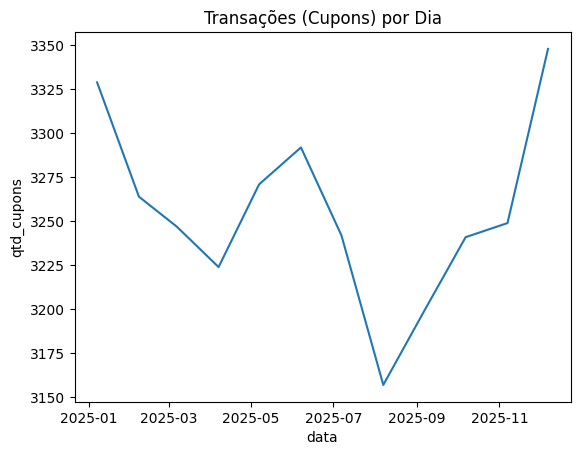

In [10]:

# Exploração — gráficos simples
if 'valor_cupom' in cupons.columns:
    plt.figure()
    cupons['valor_cupom'].dropna().hist(bins=30)
    plt.title('Distribuição — Valor de Cupom')
    plt.xlabel('valor_cupom'); plt.ylabel('frequência')
    plt.show()

if 'valor_compra' in lojas.columns:
    plt.figure()
    lojas['valor_compra'].dropna().hist(bins=30)
    plt.title('Distribuição — Valor de Compra')
    plt.xlabel('valor_compra'); plt.ylabel('frequência')
    plt.show()

if 'data' in cupons.columns:
    tmp = cupons.copy()
    tmp['data'] = pd.to_datetime(tmp['data'], errors='coerce')
    daily = tmp.groupby(tmp['data'].dt.date).size()
    plt.figure()
    daily.plot(kind='line')
    plt.title('Transações (Cupons) por Dia')
    plt.xlabel('data'); plt.ylabel('qtd_cupons')
    plt.show()


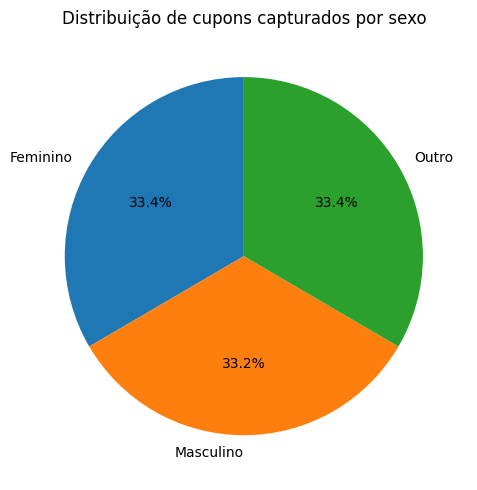

In [11]:
graficoSexo = pedestres['sexo'].value_counts().sort_index()

graficoSexo.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(5, 5),
    startangle=90
)

plt.title('Distribuição de cupons capturados por sexo')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()
     

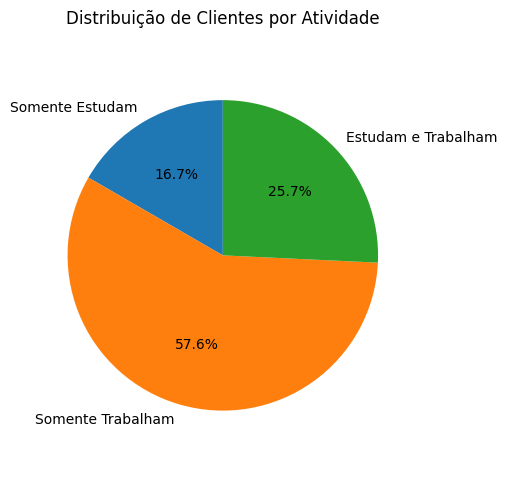

In [12]:
estuda = len(players.loc[(players['cidade_escola'].notnull()) & (players['cidade_trabalho'].isnull())])
trabalha = len(players.loc[(players['cidade_trabalho'].notnull()) & (players['cidade_escola'].isnull())])
estudaTrabalha = len(players.loc[(players['cidade_escola'].notnull()) & (players['cidade_trabalho'].notnull())])

labels = ['Somente Estudam', 'Somente Trabalham', 'Estudam e Trabalham']
sizes = [estuda, trabalha, estudaTrabalha]

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Clientes por Atividade')
plt.axis('equal')
plt.tight_layout()
plt.show()
     